# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


In [1]:
%matplotlib inline

In [2]:
import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")
names.sort()


In [3]:
import resnet_ssd_face as faceDetector
faceDetector.processDatabase(dataset, names)

# headPose dataset の検出処理後のデータ解析

     name  truePositives  falsePositives  angles  pitch  yaws
num                                                          
0      79             79              79      79     79    79
1    2340           2340            2340    2340   2340  2340
2       1              1               1       1      1     1
         name  truePositives  falsePositives    angles     pitch      yaws
num                                                                       
0    0.032645       0.032645        0.032645  0.032645  0.032645  0.032645
1    0.966942       0.966942        0.966942  0.966942  0.966942  0.966942
2    0.000413       0.000413        0.000413  0.000413  0.000413  0.000413


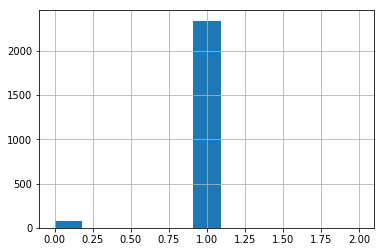

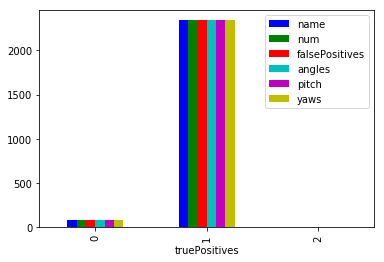

In [4]:
import pandas as pd
import readheadPose
df = pd.read_csv("log_headPose_0.csv")

pitches = []
yaws = []
angles = []
for index, rows in df.iterrows():
#    print index, rows["name"]
    pitch, yaw = readheadPose.getAngles(rows["name"])
    pitches.append(float(pitch))    
    yaws.append(float(yaw))    
    angles.append("%s_%s" % (pitch, yaw))

df["angles"] = angles
df["pitch"] = pitches
df["yaws"] = yaws
df["num"].hist(bins=11)
print df.groupby("num").count()
print df.groupby("num").count()/float(df.shape[0])
df.groupby("truePositives").count().plot(kind="bar")
#print df.groupby("angles", "num").count()



In [5]:
print "検出数の分布(比率)"
print df.groupby("num").count()/float(df.shape[0])

検出数の分布(比率)
         name  truePositives  falsePositives    angles     pitch      yaws
num                                                                       
0    0.032645       0.032645        0.032645  0.032645  0.032645  0.032645
1    0.966942       0.966942        0.966942  0.966942  0.966942  0.966942
2    0.000413       0.000413        0.000413  0.000413  0.000413  0.000413


検出数のヒストグラム


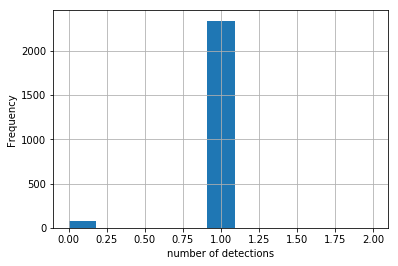

In [6]:
print "検出数のヒストグラム"
ax = df["num"].hist(bins=11)
ax.set_xlabel("number of detections")
ax.set_ylabel("Frequency")


In [7]:
print df.groupby("angles").mean()

              num  truePositives  falsePositives  pitch  yaws
angles                                                       
+0_+0    0.961538       0.961538               0      0     0
+0_+15   1.000000       1.000000               0      0    15
+0_+30   0.962963       0.962963               0      0    30
+0_+45   0.962963       0.962963               0      0    45
+0_+60   0.962963       0.962963               0      0    60
+0_+75   1.000000       1.000000               0      0    75
+0_+90   0.962963       0.962963               0      0    90
+0_-15   0.961538       0.961538               0      0   -15
+0_-30   1.000000       1.000000               0      0   -30
+0_-45   0.961538       0.961538               0      0   -45
+0_-60   0.961538       0.961538               0      0   -60
+0_-75   0.961538       0.961538               0      0   -75
+0_-90   1.000000       1.000000               0      0   -90
+15_+0   1.000000       1.000000               0     15     0
+15_+15 

In [8]:
df["num"].mean()


0.9677685950413223

In [9]:
df["truePositives"].mean()

0.9677685950413223

In [10]:
print df[df["num"]==0]


                                         name  num  truePositives  \
0     headPose/Person01/person01167+30-75.jpg    0              0   
1     headPose/Person01/person01125-30+75.jpg    0              0   
2     headPose/Person01/person01238-15+75.jpg    0              0   
3      headPose/Person01/person01243+0-45.jpg    0              0   
4      headPose/Person01/person01248+0+30.jpg    0              0   
5     headPose/Person01/person01257+15-30.jpg    0              0   
6     headPose/Person01/person01186+60+15.jpg    0              0   
7     headPose/Person01/person01267+30-75.jpg    0              0   
8     headPose/Person01/person01182+60-45.jpg    0              0   
9     headPose/Person01/person01214-30-90.jpg    0              0   
10    headPose/Person01/person01277+30+75.jpg    0              0   
11     headPose/Person01/person01185+60+0.jpg    0              0   
12    headPose/Person01/person01190+60+75.jpg    0              0   
13    headPose/Person01/person0111

pitch　が 90 のデータは検出されていないものが多いことがわかる。

In [11]:
print df[df["pitch"]==90]

                                        name  num  truePositives  \
94    headPose/Person03/person03192+90+0.jpg    0              0   
187   headPose/Person03/person03292+90+0.jpg    0              0   
280   headPose/Person04/person04192+90+0.jpg    1              1   
373   headPose/Person04/person04292+90+0.jpg    1              1   
466   headPose/Person05/person05192+90+0.jpg    0              0   
559   headPose/Person05/person05292+90+0.jpg    1              1   
652   headPose/Person06/person06192+90+0.jpg    0              0   
745   headPose/Person06/person06292+90+0.jpg    0              0   
838   headPose/Person07/person07192+90+0.jpg    1              1   
931   headPose/Person07/person07292+90+0.jpg    1              1   
1024  headPose/Person08/person08192+90+0.jpg    0              0   
1117  headPose/Person08/person08292+90+0.jpg    1              1   
1210  headPose/Person09/person09192+90+0.jpg    0              0   
1303  headPose/Person09/person09292+90+0.jpg    

In [12]:
print df[df["pitch"]==90].groupby("truePositives").count()

               name  num  falsePositives  angles  pitch  yaws
truePositives                                                
0                16   16              16      16     16    16
1                 9    9               9       9      9     9
2                 1    1               1       1      1     1


30 枚中の17 枚で検出がなかったことを示している。


In [13]:
print df[df["num"]==2]


                                        name  num  truePositives  \
2140  headPose/Person14/person14192+90+0.jpg    2              2   

      falsePositives  angles  pitch  yaws  
2140               0  +90_+0     90     0  


In [14]:
print df["truePositives"]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2390    1
2391    1
2392    1
2393    1
2394    1
2395    1
2396    1
2397    1
2398    1
2399    1
2400    1
2401    1
2402    1
2403    1
2404    1
2405    1
2406    1
2407    1
2408    1
2409    1
2410    1
2411    1
2412    1
2413    1
2414    1
2415    1
2416    1
2417    1
2418    1
2419    1
Name: truePositives, dtype: int64


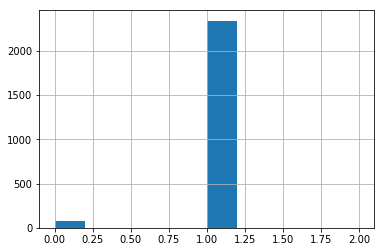

In [15]:
df["truePositives"].hist()

In [16]:
df.shape


(2420, 7)

In [17]:
print df.groupby("truePositives").count()

               name   num  falsePositives  angles  pitch  yaws
truePositives                                                 
0                79    79              79      79     79    79
1              2340  2340            2340    2340   2340  2340
2                 1     1               1       1      1     1


In [18]:
2754/2790.0


0.9870967741935484

In [19]:
df[df["truePositives"]==0].count()

name              79
num               79
truePositives     79
falsePositives    79
angles            79
pitch             79
yaws              79
dtype: int64

In [20]:
df[df["truePositives"]==0].count()/float(df.shape[0])


name              0.032645
num               0.032645
truePositives     0.032645
falsePositives    0.032645
angles            0.032645
pitch             0.032645
yaws              0.032645
dtype: float64

未検出は 1.25% である。

In [21]:
df[df["truePositives"]==0]


,name,num,truePositives,falsePositives,angles,pitch,yaws
0,headPose/Person01/person01167+30-75.jpg,0,0,0,+30_-75,30,-75
1,headPose/Person01/person01125-30+75.jpg,0,0,0,-30_+75,-30,75
2,headPose/Person01/person01238-15+75.jpg,0,0,0,-15_+75,-15,75
3,headPose/Person01/person01243+0-45.jpg,0,0,0,+0_-45,0,-45
4,headPose/Person01/person01248+0+30.jpg,0,0,0,+0_+30,0,30
5,headPose/Person01/person01257+15-30.jpg,0,0,0,+15_-30,15,-30
6,headPose/Person01/person01186+60+15.jpg,0,0,0,+60_+15,60,15
7,headPose/Person01/person01267+30-75.jpg,0,0,0,+30_-75,30,-75
8,headPose/Person01/person01182+60-45.jpg,0,0,0,+60_-45,60,-45
9,headPose/Person01/person01214-30-90.jpg,0,0,0,-30_-90,-30,-90
